# Import all Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

# Import dataset 

In [2]:
# Import Dataset 
data=pd.read_csv(r"C:\Users\ASUS\Downloads\Student_Performance.csv")
data.head(1)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91


In [14]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

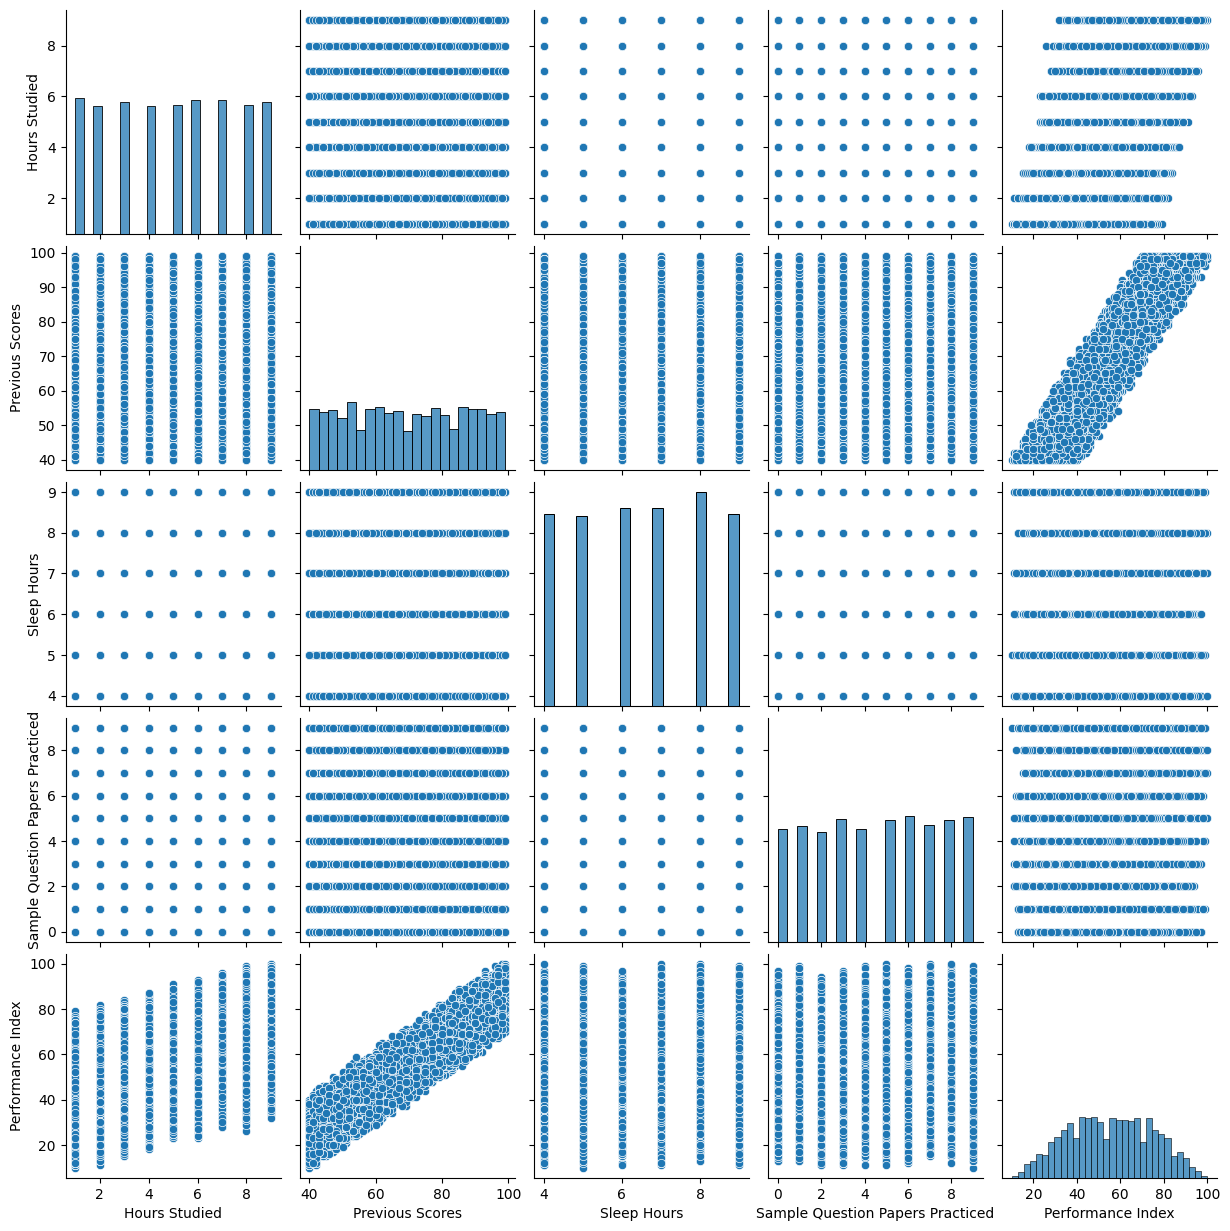

In [140]:
# Pairplot of the data Except Extracaricullar activities
df1=data[['Hours Studied', 'Previous Scores','Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']]
sns.pairplot(df1)

<Axes: >

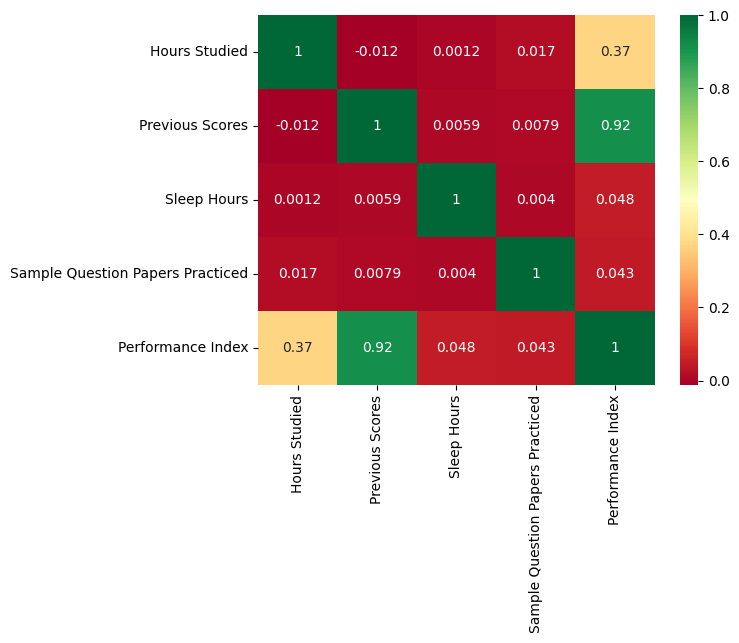

In [144]:
# Check the correclation value 
sns.heatmap(df1.corr(), annot=True, cmap='RdYlGn')

In [4]:
# Checking that Data is clean or Not 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [5]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

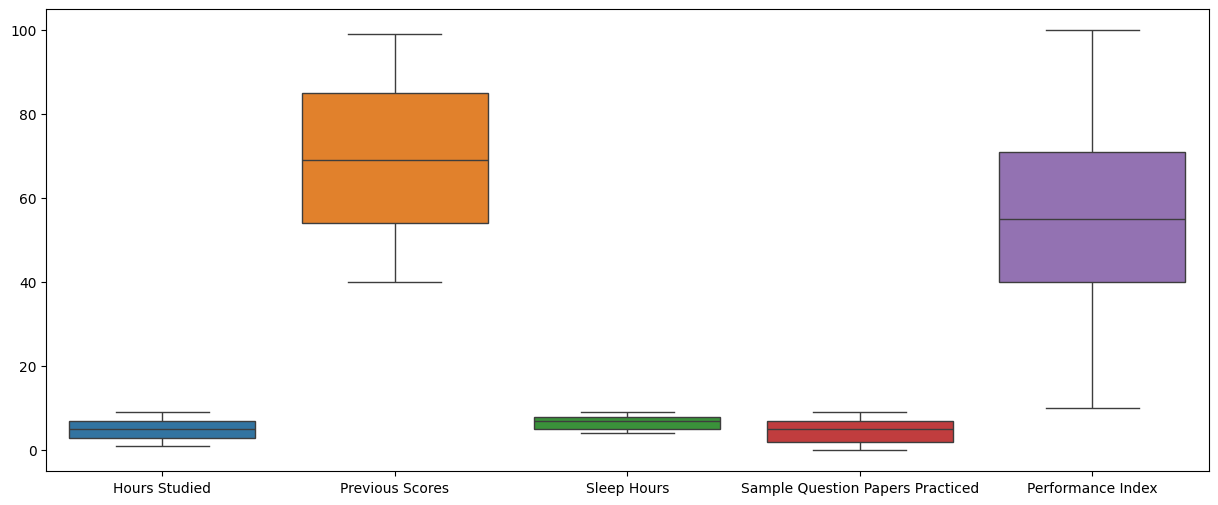

In [6]:
# Checking of Theior any Outlier is present or not 
plt.figure(figsize=(15, 6))
sns.boxplot(data)
plt.show()

# Split the dataset into x and y 


In [7]:
x=data.iloc[:,:-1]
y=data['Performance Index']

# Split the datasset in x_train , X-test , y_train ,y_test


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

# Now time to make Pipeline 


In [52]:
x_train.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9254,5,49,No,7,5
1561,2,48,Yes,7,6
1670,2,81,No,7,2
6087,2,46,No,6,1
6669,8,47,No,9,0


In [94]:
# Handle Missing Values
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
trf1=ColumnTransformer(transformers=[('except_extra_Activities',SimpleImputer(),[0,1,3,4]),('extra_act',SimpleImputer(strategy='most_frequent'),[2])],remainder='passthrough')

In [95]:
# Do the encoding First in column Extracurricular Activities
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf2=ColumnTransformer(transformers=[('encoding',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[4])],remainder='passthrough')

In [96]:
# Second Column of Pipeline 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
trf3=ColumnTransformer(transformers=[('Scaler',MinMaxScaler(),slice(0,6))])

In [97]:
# Feature Selection 
from sklearn.feature_selection import SelectKBest,chi2
trf4=SelectKBest(score_func=chi2,k=5)

In [98]:
# Main Apply the Model Linear Regression ]
from sklearn.linear_model import LinearRegression
trf5=LinearRegression()

In [99]:
# Import Pipeline
from sklearn.pipeline import Pipeline
pipe=Pipeline([('trf1',trf1),('trf2',trf2),('trf3',trf3),('trf4',trf4),('trf5',trf5)])

In [100]:
pipe.fit(x_train,y_train)

,steps,"[('trf1', ...), ('trf2', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('except_extra_Activities', ...), ('extra_act', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [102]:
pipe.score(x_train,y_train)*100

98.78730826973215

In [127]:
# Now pass the x_test and check how it Give the correct answer 
x_pred=pd.DataFrame(pipe.predict(x_test),columns=['Prediction_of_x'])
# x_pred["Original_data_of_pred_x"]=y_test.values

In [131]:
x_pred.head()

,Prediction_of_x
0,55.214283
1,21.948614
2,47.830510
3,31.209359
4,42.739959


In [130]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,x_pred)
mse

4.422437866529461

In [134]:
# Side by Side Comparision 
x_pred["y_test"]=y_test.values

In [135]:
x_pred

,Prediction_of_x,y_test
0,55.214283,51
1,21.948614,20
2,47.830510,46
3,31.209359,28
4,42.739959,41
...,...,...
1995,47.188076,45
1996,63.009101,66
1997,17.275646,16
1998,63.268903,65


# Output After first column Simple Imputer 


In [169]:
x=trf1.fit_transform(x_train)
pd.DataFrame(trf1.fit_transform(x_train)).head()


,0,1,2,3,4
0,5.0,49.0,7.0,5.0,No
1,2.0,48.0,7.0,6.0,Yes
2,2.0,81.0,7.0,2.0,No
3,2.0,46.0,6.0,1.0,No
4,8.0,47.0,9.0,0.0,No


# Output after second column  One Hot Encoder 

In [170]:
y=trf2.fit_transform(x)
pd.DataFrame(trf2.fit_transform(x)).head()

,0,1,2,3,4,5
0,1.0,0.0,5.0,49.0,7.0,5.0
1,0.0,1.0,2.0,48.0,7.0,6.0
2,1.0,0.0,2.0,81.0,7.0,2.0
3,1.0,0.0,2.0,46.0,6.0,1.0
4,1.0,0.0,8.0,47.0,9.0,0.0


# Output After Min Max Scalar 

In [171]:
z=trf3.fit_transform(y)
pd.DataFrame(trf3.fit_transform(y)).head()

,0,1,2,3,4,5
0,1.0,0.0,0.500,0.152542,0.6,0.555556
1,0.0,1.0,0.125,0.135593,0.6,0.666667
2,1.0,0.0,0.125,0.694915,0.6,0.222222
3,1.0,0.0,0.125,0.101695,0.4,0.111111
4,1.0,0.0,0.875,0.118644,1.0,0.000000


# Output after Feature Selection

In [173]:
# Output after Feature Selection
v=trf4.fit_transform(z,y_train)
pd.DataFrame(v).head()

,0,1,2,3,4
0,1.0,0.0,0.500,0.152542,0.6
1,0.0,1.0,0.125,0.135593,0.6
2,1.0,0.0,0.125,0.694915,0.6
3,1.0,0.0,0.125,0.101695,0.4
4,1.0,0.0,0.875,0.118644,1.0


# Output After Linear Model 

In [178]:
trf5.fit(v, y_train) 

# Once fitted, you get your output (predictions) like this:
predictions = trf5.predict(v)
pd.DataFrame(predictions)

,0
0,34.390634
1,25.414302
2,58.378728
3,22.295099
4,41.876517
...,...
7995,44.105020
7996,51.818449
7997,44.795344
7998,21.887945
